In [2]:
import numpy as np

In [3]:
neighbors = {
    1:[2,3,'b1','b2'],
    2:[1,4,'b1'],
    3:[1,4,'b2'],
    4:[2,3]
}

normals = {
    (1,2):np.array([3/5,-4/5]),
    (1,3):np.array([0,1.0]),
    (1,'b1'):np.array([0,-1.0]),
    (1,'b2'):np.array([-3/5,4/5]),
    (2,1):np.array([-3/5,4/5]),
    (2,4):np.array([0,1.0]),
    (2,'b1'):np.array([0,-1.0]),
    (3,1):np.array([0,-1.0]),
    (3,4):np.array([3/5,-4/5]),
    (3,'b2'):np.array([-3/5,4/5]),
    (4,3):np.array([-3/5,4/5]),
    (4,2):np.array([0,-1.0])
}

Tb1 = 20.0
Tb2 = 30.0

In [4]:
# Interpolate the gradient

def interpolateGradient(elem, T):
    summ = np.array([0.0,0.0])
    for neighbor in neighbors[elem]:
        if type(neighbor) == type(1):
            summ += (T[neighbor - 1,0] - T[elem - 1,0]) * normals[(elem,neighbor)]
        if type(neighbor) == type(""):
            if neighbor == 'b1':
                summ += (Tb1 - T[elem - 1,0]) * normals[(elem,neighbor)]
            else:
                summ += (Tb2 - T[elem - 1,0]) * normals[(elem,neighbor)]
    return (0.5/0.25) * summ

def rhs_elem_one(T):
    summ = 0.0
    summ += (0.25) * np.dot((interpolateGradient(2,T) - interpolateGradient(1,T)),np.array([-2/5,-4/5]))
    summ += (0.25) * np.dot((interpolateGradient(3,T) - interpolateGradient(1,T)),np.array([-4/5,2/5]))
    summ += (0.25) * np.dot((-1*interpolateGradient(1,T)),np.array([2/5,4/5]))
    summ += (0.25) * np.dot((-1*interpolateGradient(1,T)),np.array([4/5,-2/5]))
    return summ

def rhs_elem_two(T):
    summ = 0.0
    summ += (0.25) * np.dot((interpolateGradient(1,T)-interpolateGradient(2,T)),np.array([2/5,4/5]))
    summ += (0.25) * np.dot((interpolateGradient(4,T) - interpolateGradient(2,T)),np.array([-4/5,2/5]))
    summ += (0.25) * np.dot((-1*interpolateGradient(2,T)),np.array([4/5,-2/5]))
    return summ

def rhs_elem_three(T):
    summ = 0.0
    summ += (0.25) * np.dot((interpolateGradient(4,T)-interpolateGradient(3,T)),np.array([-2/5,-4/5]))
    summ += (0.25) * np.dot((interpolateGradient(1,T) - interpolateGradient(3,T)),np.array([4/5,-2/5]))
    summ += (0.25) * np.dot((-1*interpolateGradient(3,T)),np.array([2/5,4/5]))
    return summ

def rhs_elem_four(T):
    summ = 0.0
    summ += (0.25) * np.dot((interpolateGradient(3,T)-interpolateGradient(4,T)),np.array([2/5,4/5]))
    summ += (0.25) * np.dot((interpolateGradient(2,T) - interpolateGradient(4,T)),np.array([4/5,-2/5]))
    return summ

In [5]:
def correct_rhs(T):
    T[0] += rhs_elem_one(T)
    T[1] += rhs_elem_two(T)
    T[2] += rhs_elem_three(T)
    T[3] += rhs_elem_four(T)

In [6]:
A = np.matrix([
    [6,-1,-1,0],
    [-1,4,0,-1],
    [-1,0,4,-1],
    [0,-1,-1,2]
])

b = np.array([100,40,60,0]).reshape((-1,1))

In [7]:
# Gauss Seidel + corrective terms
# I think it's actually the Jacobi...

# initial guess
T = np.array([0,0,0,0]).reshape((-1,1))

B = np.diag(np.diag(A))
M = (-1)*(A - B)
Binv = np.linalg.inv(B)
G = np.matmul(Binv, M)
g = np.matmul(Binv, b)


Tn = np.matmul(G,T) + g
correct_rhs(Tn)

resid = []
iter = 1
while (np.abs(np.linalg.norm(Tn - T)) > 1e-10 and iter < 50000):
    T = Tn*0 + Tn
    Tn = np.matmul(G, T) + g
    correct_rhs(Tn)
    resid.append(np.abs(np.linalg.norm(Tn - T)))
    iter += 1

print(Tn)
print("Iterations: " + str(iter))

[[24.40677966]
 [26.02063375]
 [26.50700074]
 [27.24392041]]
Iterations: 21


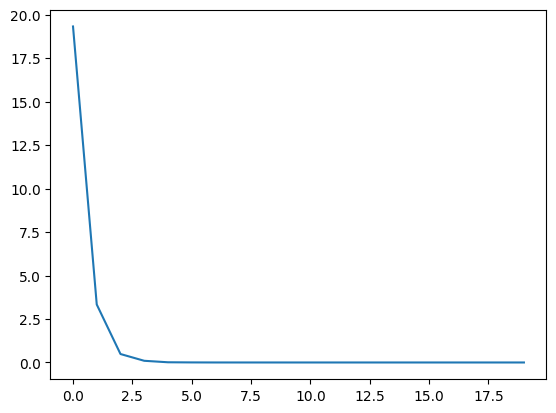

In [10]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0,20),resid)

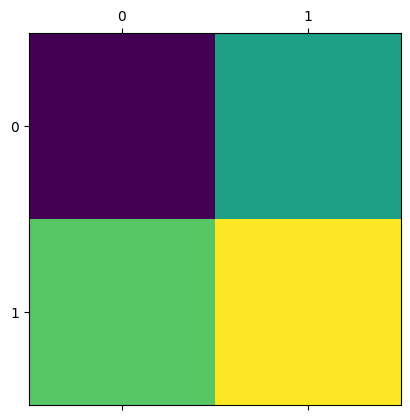

In [11]:
plt.matshow(Tn.reshape((2,2)))